In [1]:
import tensorflow as tf
import numpy as np

encoder = tf.keras.models.load_model("../Models/ae_encoder_mixed.keras")


2025-09-18 17:54:31.478932: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-18 17:54:33.435108: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-18 17:54:33.450639: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 1349980000 exceeds 10% of free system memory.
2025-09-18 17:54:33.696161: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 1349980000 exceeds 10% of free system memory.
2025-09-18 17:54:33.871919: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 1349980000 exceeds 10% of free system memory.
2025-09-18 17:54:36.476993: W external/local_x

In [2]:
X = np.load("../Data/LPS/sal-lps-150-1500(labeled)_fulltest_data.npy")
Y = np.load("../Data/LPS/sal-lps-150-1500(labeled)_fulltest_labels.npy")
# X = np.load("../Data/LPS/sal-lps-150-1500(labeled)_data.npy")
# Y = np.load("../Data/LPS/sal-lps-150-1500(labeled)_labels.npy")
X = encoder.predict(X)

  1/103 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step

2025-09-18 17:54:37.372142: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 884506896 exceeds 10% of free system memory.


103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step


In [3]:
classifier = tf.keras.models.load_model("../Models/AE_Classifier_larger.keras")
y_pred_probs = classifier(X)
y_pred = np.argmax(y_pred_probs,axis=1)




TN: 745, FP: 891, FN: 146, TP: 1494
AUC: 0.8403305578746497


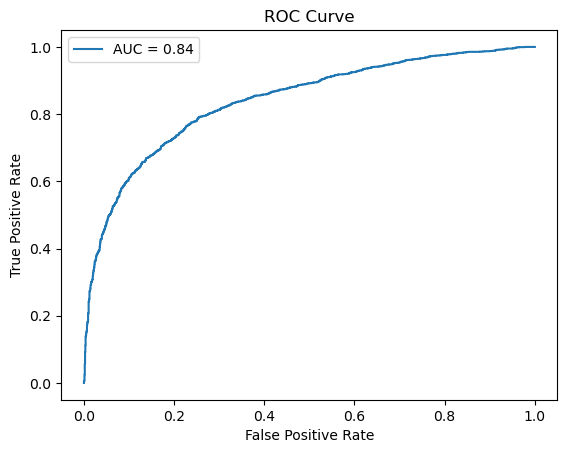

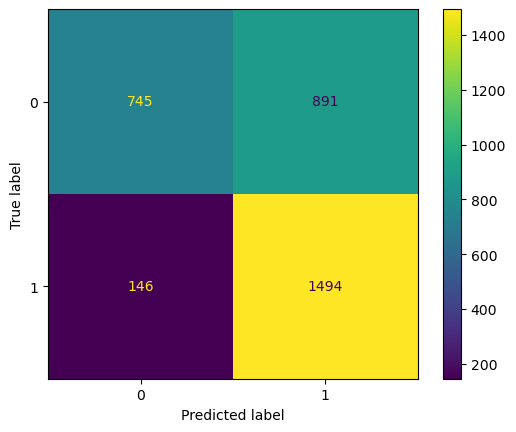

Test Accuracy: 0.6835
Precision: 0.6264
Recall (Sensitivity/TPR): 0.9110
Specificity (TNR): 0.4554
F1-Score: 0.7424
False Positive Rate (FPR): 0.5446
False Negative Rate (FNR): 0.0890
Negative Predictive Value (NPV): 0.8361


In [4]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay,precision_score,recall_score,f1_score

cm = confusion_matrix(Y, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

if len(np.unique(Y)) == 2:
    auc = roc_auc_score(Y, y_pred_probs[:, 1])
    print(f'AUC: {auc}')
    fpr, tpr, thresholds = roc_curve(Y, y_pred_probs[:, 1])
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
# print(f'Test loss: {loss}')
accuracy = np.mean(y_pred == Y)
print(f'Test Accuracy: {accuracy:.4f}')

precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
true_positive_rate = tp / (tp + fn)  # Same as recall/sensitivity
negative_predictive_value = tn / (tn + fn)

print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity/TPR): {recall:.4f}')
print(f'Specificity (TNR): {specificity:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'False Positive Rate (FPR): {false_positive_rate:.4f}')
print(f'False Negative Rate (FNR): {false_negative_rate:.4f}')
print(f'Negative Predictive Value (NPV): {negative_predictive_value:.4f}')


Test Accuracy: 0.7341
Precision: 0.6914
Recall (Sensitivity/TPR): 0.8470
Specificity (TNR): 0.6210
F1-Score: 0.7613
False Positive Rate (FPR): 0.3790
False Negative Rate (FNR): 0.1530
Negative Predictive Value (NPV): 0.8019